In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [2]:
df = pd.read_csv("Polynomialdata_train.csv")


In [3]:
df.head()

,target,feature 1,feature 2,feature 3
0,4.131528e+06,5.221849,7.295111,95.716846
1,3.172975e-01,-5.106284,4.220085,-6.172360
2,4.676422e+04,-4.218053,-7.573823,-39.493884
3,1.404175e+05,-18.439122,-2.275148,-40.885857
4,4.788988e+03,13.353046,3.103837,18.622367


In [4]:
x_train = df.sample(frac=0.6, random_state=42)
temp_df = df.drop(x_train.index)
x_dev = temp_df.sample(frac=0.5, random_state=42)
x_test = temp_df.drop(x_dev.index)
y_train = x_train.pop("target").values
y_dev = x_dev.pop("target").values
y_test = x_test.pop("target").values


In [5]:
print(f"x_train : {x_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"x_dev : {x_dev.shape}")
print(f"y_test : {y_test.shape}")
print(f"y_dev : {y_dev.shape}")
print(f"y_train : {y_train.shape}")

x_train : (30000, 3)
x_test : (10000, 3)
x_dev : (10000, 3)
y_test : (10000,)
y_dev : (10000,)
y_train : (30000,)


In [6]:
x_dev.head()

,feature 1,feature 2,feature 3
26424,-29.110229,-2.799991,-32.897124
5154,-14.847473,-0.669821,16.765088
21575,28.260332,-6.656657,-70.141487
2821,-1.862729,0.272504,39.132963
34740,14.416293,-4.891206,-18.523530


In [7]:
x_test.head()

,feature 1,feature 2,feature 3
5,7.614978,3.154215,-24.546191
9,27.395374,1.829287,-37.797851
12,-17.195166,5.513374,21.605829
20,-62.493575,-1.058732,-52.317223
21,25.283828,1.573643,-82.528382


In [8]:
df.head()

,target,feature 1,feature 2,feature 3
0,4.131528e+06,5.221849,7.295111,95.716846
1,3.172975e-01,-5.106284,4.220085,-6.172360
2,4.676422e+04,-4.218053,-7.573823,-39.493884
3,1.404175e+05,-18.439122,-2.275148,-40.885857
4,4.788988e+03,13.353046,3.103837,18.622367


In [24]:
def initialising_para(x):
    m , n = x.shape
    w = np.random.randn(n)
    b = 0
    return w, b

In [25]:
def create_polynomial_features(df, degree):
 
    feature_df = df.copy()
    new_features = []  # List to accumulate new features as DataFrames
    
    # Loop over each degree from 2 to the specified degree
    for i in range(2, degree + 1):
        # Generate combinations of columns for the current degree
        for combination in itertools.product(df.columns, repeat=i):
            # Sort the combination to avoid duplicate feature names like 'A*B' and 'B*A'
            sorted_combination = sorted(combination)
            feature_name = '*'.join(sorted_combination)
                # Compute the product of the columns in the combination
            new_feature = df[list(sorted_combination)].prod(axis=1)
            new_feature.name = feature_name
                
                # Append the new feature as a DataFrame to the list
                
            new_features.append(new_feature)
    
    # Concatenate the new features with the original DataFrame
    feature_df = pd.concat([feature_df] + new_features, axis=1)
    feature_df = feature_df.T.drop_duplicates().T
    return feature_df

In [26]:
def normal_ele(x):
    meu = np.mean(x, axis = 0)
    max = np.max(x, axis = 0)
    min = np.min(x, axis = 0)
    std = np.std(x, axis = 0)
    return meu, max, min, std

In [27]:
def normalisation(x, meu, max, min, std):
    epsilon = 10e-5
    n_x = (x - meu)/(std + epsilon)
    return n_x

In [28]:
def cost(x, w, b, y):
    m, n = x.shape
    y_hat = np.dot(x, w) + b
    j = np.sum(np.square(y_hat - y))
    j /= (2 * m)
    return j

In [29]:
def derivatives(x, w, b, y):
    m, n = x.shape
    y_hat = np.dot(x, w) + b
    err = y_hat - y
    dj_dw = np.dot(x.T, err) / m
    dj_db = np.sum(err) / m
    return dj_dw, dj_db

In [30]:
def update_para(x, w, b, y, alpha):
    dj_dw , dj_db = derivatives(x, w, b, y)
    w = w -  alpha*dj_dw
    b = b - alpha*dj_db
    return w, b

In [61]:

degree = 7
poly_x_train = create_polynomial_features(x_train, degree)
w, b = initialising_para(poly_x_train)
meu, max, min, std = normal_ele(poly_x_train)
# print(meu , max, min)
n_poly_x_train = normalisation(poly_x_train, meu, max, min, std)


In [62]:
# n_poly_x_train.head()
y_hat = np.dot(n_poly_x_train, w) + b
print(y_hat)

[  1.09385885  -8.71233733 -15.54501215 ...  -4.42554981   3.88860422
  -1.47282948]


In [63]:
num_iters = 1000
alpha = 0.03
j_his = []
print("start")
for i in range(num_iters):
    w, b = update_para(n_poly_x_train, w, b, y_train, alpha)
    j = cost(n_poly_x_train, w, b, y_train)
    j_his.append(j)
    if i %100 ==0:
        print(f"iteration: {i} : cost {j}")

start
iteration: 0 : cost 53919736219850.91
iteration: 100 : cost 1224819206907.4106
iteration: 200 : cost 493600512907.3471
iteration: 300 : cost 312732150603.5351
iteration: 400 : cost 236294854147.4398
iteration: 500 : cost 192630390608.3263
iteration: 600 : cost 163230728700.03094
iteration: 700 : cost 141484453544.6121
iteration: 800 : cost 124436815503.47548
iteration: 900 : cost 110553124692.57425


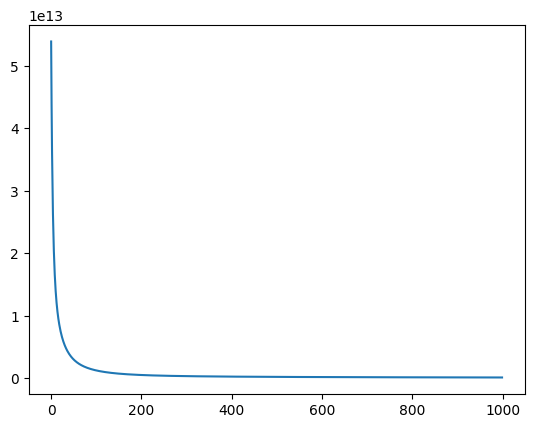

In [64]:
plt.plot(np.arange(num_iters), j_his)

In [65]:
poly_x_test = create_polynomial_features(x_test, degree)
n_poly_x_test = normalisation(poly_x_test, meu, max, min, std)
y_hat_test = np.dot(n_poly_x_test, w) + b
test_err = y_hat_test - y_test


In [66]:
gr2_test = np.sum(np.square(y_test - y_hat_test))
yr2_test = np.sum(np.square(y_test - np.mean(y_test)))
1 - (gr2_test / yr2_test)

0.9967295585284058

In [67]:
y_hat_train = np.dot(n_poly_x_train, w) + b

In [68]:
gr2_train = np.sum(np.square(y_train - y_hat_train))
yr2_train = np.sum(np.square(y_train - np.mean(y_train)))
1 - (gr2_train / yr2_train)

0.9985094190479937